<a href="https://colab.research.google.com/github/mianzha/Zhao_Mian_TSE/blob/main/tp1_m2dsss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Data Analysis: Generalities, Complex Networks and Node-Centric Metrics

In this practical work, we will first check if a network satisfies the 3 constraints to be considered as a complex network and then, we will determine how important nodes are within this network.

The library we will use for handling networks is networkx

## First, let's install the potentially missing libraries
(not necessary if you are certain these libs are installed on your system)

In [1]:
! pip install pandas
! pip install networkx
! pip install seaborn

## Second, let's import the useful packages
You can avoid the first line if you are not using a Jupyter notebook. This line enables the visualization to be displayed in the notebook.

In [2]:
%matplotlib inline

import networkx as nx
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Good, if you have not encounter any problems, we can start working now!

### First download the dataset (on Moodle)

In [3]:
# Obviously, you must replace the path below by the appropriate path
pathData = nx.read_pajek("/content/airports.net")
air_g = nx.DiGraph(pathData)

### Then, navigate through the documentation of the networkx package and find how to load networks in the pajek format

Note that the graph should be __directed__.

TIP: to create a directed simple graph after loading the pajek network, you must use the follwing instruction `g = nx.DiGraph(g)` where `g` is the loaded pajek network.

# Check the complex network properties
## Long-tail distribution

### Plot the degree distribution of the graph
  1. Calculate and store the degree of each node
  2. Convert the result (a dict) into a Pandas object, a Series
  3. Use the seaborn `distplot` function to plot the degree distribution. Check the documenetation to set the parameters as follows: 20 bins and no gaussian kernel density estimate. Note that you must use the `plt.show()` instruction afterward to visualize the result.


In [4]:
##1. Calculate and store the degree of each node
degree = dict(air_g.degree)

In [5]:
##2. Convert the result (a dict) into a Pandas object, a Series
degree = pd.Series(degree)

<ipython-input-6-d8ba9e952fcf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(degree, bins = 20, kde = False)


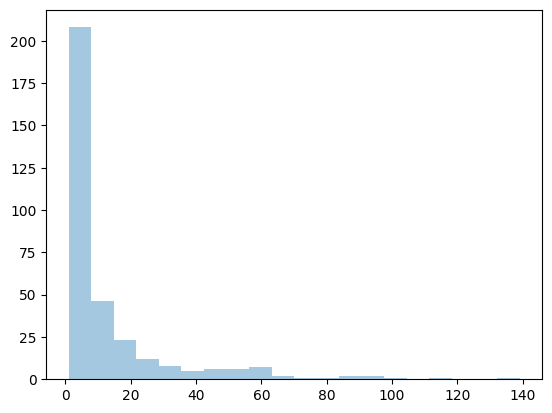

In [6]:
#3. Use the seaborn `distplot` function to plot the degree distribution. Check the documenetation to set the parameters as
#follows: 20 bins and no gaussian kernel density estimate. Note that you must use the `plt.show()` instruction afterward to
#visualize the result.

sns.distplot(degree, bins = 20, kde = False)
plt.show()

### Check if the graph satisfies the power-law degree property
Modify the call to the `distplot` function to graphically check if the degree distibution fits a power-law distribution. To do so, you should set the `fit` parameter to `stats.powerlaw`. Conclude.

<ipython-input-7-7040db149aa2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(degree, bins = 20, kde = False, fit = stats.powerlaw)


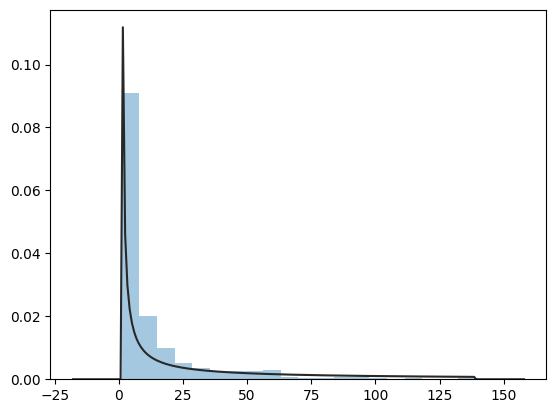

In [7]:
fig, ax = plt.subplots(1, 1)

sns.distplot(degree, bins = 20, kde = False, fit = stats.powerlaw)
plt.show()

## Small-world hypothesis
We now want to check if this network satisfies the small-world hypothesis. Calculate the average shortest path length and conclude if this network satisfies the small world hypothesis.
  

In [8]:
node = list(air_g.nodes)
sp = []
for i in range(len(node)-1):
    for j in range(i+1, len(node)):
        if nx.has_path(air_g, node[i], node[j]) == True:
            sp.append(nx.shortest_path_length(air_g, node[i], node[j]))

In [9]:
sum(sp)/len(sp)

2.5639775322510956

### Check the strong community structure
To check how string is the community structure in this network, we will apply the following methodology:
  1. Use the `gnm_random_graph` function to generate a random graph having the same number of vertices and edges than the studied network
  2. Calculate the average clustering on both networks
  3. Conclude

In [13]:
# 1. Use the `gnm_random_graph` function to generate a random graph having the same number of vertices and edges than the studied network
n = len(air_g.nodes)
m = len(air_g.edges)
rand_g = nx.gnm_random_graph(n, m, seed = 1234, directed = True)

In [18]:
#2. Calculate the average clustering on both networks
print('the average clustering on both graphs are respectively:','airport',nx.average_clustering(air_g), ' and random graph', nx.average_clustering(rand_g))

the average clustering on both graphs are respectively: airport 0.3126086245812515  and random graph 0.01837120765636259


Conclusion:

# Node-Centric Metrics
We will now focus on the relative importance of vertices within the network. Luckily, many centrality metrics are implemented in networkx.

## Centrality Metrics
Have a look to the package documentation and calculate the following centralities:
  1. degree
  2. closeness
  3. eigenvector
  4. Katz
  5. betweenness

In [20]:
#1.a.in-degree
d_in = nx.in_degree_centrality(air_g)

In [21]:
#1.b.out-degree
d_out = nx.out_degree_centrality(air_g)

In [23]:
#2.closeness
cl_c = nx.closeness_centrality(air_g)

In [26]:
#3.eigenvector
ei_c = nx.eigenvector_centrality(air_g, max_iter=1000)

In [28]:
#4.Katz
K_c = nx.katz_centrality(air_g)

In [29]:
#5.betweenness
bet_c = nx.betweenness_centrality(air_g)

## Page Rank and HITS
Similarly to the previous question, have a look to the package documentation and calculate the following metrics:

  1. Page Rank
  2. Hub and Authorities (HITS)


In [32]:
#1.Page rank
p_k = nx.pagerank(air_g)

In [33]:
#2.Hub and Authorities (HITS)
h_a = nx.hits(air_g)

## On the correlation of node-centric metrics
First, create a dataframe using with the above calculated centralities.

Then, we will plot the pairwise relationships between centralities to have a first glimpse of the possible correlation between them. For this, use the `pairplot` function of the `seaborn` package.

We will now assess more properly these potential correlations. For this, use the `corr()` on your data frame. Be aware that the default method mignt not be appropriate to your case. Once the pairwise correlations have been calculated, we will plot the related method using the `heatmap()` function of the `seaborn` package. TIP: to change the color scheme, you can use the `cmap` parameter with value `plt.get_cmap(xxx)` where `xxx` is a color scheme (visit [this site](https://matplotlib.org/users/colormaps.html) to get the list of existing cholor schemes).

On the finding of atypical vertices
------------------------------------

As discussed during the lecture ans as you have just seen in the previous question, centrality metrics are often positively correlated. We will now find some key vertices in the network. Typically, these vertices are vertices that somehow "break" the positive pairwise correlations.
You mission is to find at least one of these vertices. To do so, you will apply the following methodology:
  1. Extract the 10 top airports per centrality metric
  2. Comparethe list and conclude


Graph visualization
-----------------------------------

We will finally visualize the network to find some key vertices in the network. This can be useful to explain why some vertices play a crucial role in the network.

TIP 1: one way to fix the spatial position of the vertices is to use the vertex attributes `x` and `y`. To do so, you should create a dictionnary such that the keys are the labels of the vertices and the values are tuples isuch as `(x,y)`
TIP 2: you can pass a dictionnary as parameter of the `draw_network` function to specify some visualization parameter, e.g., `nx.draw_network(g, **options)` where `options` is defined as:
```python
options = {
    'node_color' : # either a color or a list with values (the vertex color will thus change according to the value) -- the size of the list should be the same as the number of vertices in the network
    'node_size' : 500,
    'cmap' : plt.get_cmap("jet"), # a color scheme (see below)
    #'vmin' : 0, # these two options are used to adjust the color scheme
    #'vmax' : 0.7 , # these two options are used to adjust the color scheme
    'node_shape' : 'o', # the shape of the node
    'with_labels' : True # print labels or not
}
```